In [1]:
library(class)
library(tidyverse)
library(C50)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1     v purrr   0.3.2
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'C50' was built under R version 3.6.3"

In [2]:
# Q1
iris_train <- read.csv("C:/Users/ROG/Desktop/iris_train.csv")
iris_test <- read.csv("C:/Users/ROG/Desktop/iris_test.csv")

# Q1(a) Perform the min-max normalization on the two datasets iris_train.csv and iris_test.csv.
iris_train2 <- iris_train[, -5]
iris_test2 <- iris_test[, -5]

iris_train_n <- iris_train2
iris_test_n <- iris_test2

train_min <- apply(iris_train2, 2, min)
train_max <- apply(iris_train2, 2, max)

for (i in 1:ncol(iris_train2)) {
  iris_train_n[, i] <- (iris_train2[, i] - train_min[i]) / (train_max[i] - train_min[i]) 
  iris_test_n[, i] <- (iris_test2[, i] - train_min[i]) / (train_max[i] - train_min[i]) 
}



# Q1(b) Perform the k-nearest neighbour classification using knn from the package class with k = 3.
iris_train_labels <- iris_train$Species
iris_test_labels <- iris_test$Species

knn_predicted <- knn(train = iris_train_n, test = iris_test_n, cl = iris_train_labels, k = 3)


# Q1(c) Find out the testing accuracy in Q1(b).
(tb1 <- table(iris_test_labels, knn_predicted))

                knn_predicted
iris_test_labels setosa versicolor virginica
      setosa         15          0         0
      versicolor      0         16         2
      virginica       0          1        16

In [3]:
(accuracy <- sum(diag(tb1)) / length(iris_test_labels))

[1] 0.94

In [4]:
# Q1(d)
# The prob argument in knn() determines if the proportion of the votes for the winning class are returned as attribute prob.
# If prob = TRUE, the percentage of votes for the winning class is returned in the form of attribute prob.

(knn_predicted2 <- knn(train = iris_train_n, test = iris_test_n, cl = iris_train_labels, k = 3, prob = TRUE))

[1] virginica  virginica  setosa     versicolor virginica  virginica 
 [7] setosa     versicolor versicolor virginica  versicolor setosa    
[13] virginica  virginica  virginica  setosa     versicolor setosa    
[19] versicolor virginica  versicolor setosa     virginica  setosa    
[25] setosa     versicolor setosa     virginica  setosa     setosa    
[31] virginica  setosa     virginica  setosa     versicolor virginica 
[37] setosa     versicolor versicolor setosa     virginica  versicolor
[43] virginica  virginica  versicolor versicolor virginica  versicolor
[49] versicolor versicolor
attr(,"prob")
 [1] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [8] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.6666667 1.0000000
[15] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.6666667 1.0000000
[22] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[29] 1.0000000 1.0000000 1.0000000 1.0000000 0.6666667 1.0000000 1.0000000
[36] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.6666667 1.0000000
[43] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.6666667 1.0000000
[50] 1.0000000
Levels: setosa versicolor virginica

In [5]:
# Q2 Write a function called knn_L1 that performs k-nearest neighbour classification using the L1-norm.
knn_L1 <- function(train, test, cl, k){
  class <- rep(0, nrow(test))
  prob <- rep(0, nrow(test))
  n <- apply(matrix(unlist(train), nrow = nrow(train), ncol = ncol(train)), 2, as.numeric)
  
  for(j in 1:nrow(test)){
    m <- apply(matrix(test[j,], nrow = nrow(train), ncol = ncol(test), byrow = TRUE), 2, as.numeric)
    d <- rowSums(abs(n - m))
    tb <- tibble("L1" = d, "label" = cl) %>% 
      arrange(L1) %>% 
      filter(L1 <= L1[k])
    result <- as.data.frame(prop.table(table(tb$label)))
    class[j] <- knitr::combine_words(as.character(result$Var1[result$Freq == max(result$Freq)]), and = ", ")
    prob[j] <- max(result$Freq)
  }
  list(class = class, prob = prob)
}

In [6]:
# Q3 Redo Q1(b) and Q1(c) with your function in Q2.
knn_L1predicted <- knn_L1(train = iris_train_n, test = iris_test_n, cl = iris_train_labels, k = 3)
(tb2 <- table(iris_test_labels, knn_L1predicted$class))

                
iris_test_labels setosa versicolor virginica
      setosa         15          0         0
      versicolor      0         16         2
      virginica       0          1        16

In [7]:
(accuracy2 <- sum(diag(tb2)) / length(iris_test_labels))

[1] 0.94

In [8]:
# Q4 Perform the classification using your function knn_L1() in Q2, 
# knn() and C5.0. Compare the testing errors of these 3 methods. Use k = 11.
wbcd_train <- read.csv("C:/Users/ROG/Desktop/wbcd_train.csv")
wbcd_test <- read.csv("C:/Users/ROG/Desktop/wbcd_test.csv")

wbcd_train2 <- wbcd_train[, -(1:2)]
wbcd_test2 <- wbcd_test[, -(1:2)]

wbcd_train_labels <- wbcd_train$diagnosis
wbcd_test_labels <- wbcd_test$diagnosis

wbcd_train_n <- wbcd_train2
wbcd_test_n <- wbcd_test2

wbcd_train_min <- apply(wbcd_train2, 2, min)
wbcd_train_max <- apply(wbcd_train2, 2, max)

for (i in 1:ncol(wbcd_train2)) {
  wbcd_train_n[, i] <- (wbcd_train2[, i] - wbcd_train_min[i]) / (wbcd_train_max[i] - wbcd_train_min[i]) 
  wbcd_test_n[, i] <- (wbcd_test2[, i] - wbcd_train_min[i]) / (wbcd_train_max[i] - wbcd_train_min[i]) 
}

knn_L1predicted_q4 <- knn_L1(train = wbcd_train_n, test = wbcd_test_n, cl = wbcd_train_labels, k = 11)
(tb_knn_L1 <- table(wbcd_test_labels, knn_L1predicted_q4$class))

                
wbcd_test_labels  B  M
               B 59  1
               M  3 37

In [9]:
(error_rate_knn_L1 <- 1 - sum(diag(tb_knn_L1)) / length(wbcd_test_labels))

[1] 0.04

In [10]:
knn_predicted <- knn(train = wbcd_train_n, test = wbcd_test_n, cl = wbcd_train_labels, k = 11)
(tb_knn <- table(wbcd_test_labels, knn_predicted))

                knn_predicted
wbcd_test_labels  B  M
               B 57  3
               M  5 35

In [11]:
(error_rate_knn <- 1 - sum(diag(tb_knn)) / length(wbcd_test_labels))

[1] 0.08

In [12]:
wbcd_ct <- C5.0(wbcd_train2, as.factor(wbcd_train_labels))
(tb_c5 <- table(wbcd_test_labels, predict(wbcd_ct, wbcd_test)))

                
wbcd_test_labels  B  M
               B 59  1
               M  4 36

In [13]:
(error_rate_c5 <- 1 - sum(diag(tb_c5)) / length(wbcd_test_labels))

[1] 0.05

In [14]:
# Q6(a) Import the datasets in R. For each dataset, check if there are rows with trading volume being 0
# (the corresponding variable is Volume.USDT). If yes, remove the rows (e.g. use filter()). Store the cleaned
# datsets with names BTC_min_c, ETH_min_c, BTC_day_c, and ETH_day_c.
BTC_min <- read.csv("C:/Users/ROG/Desktop/BTCUSDT_minute.csv")
ETH_min <- read.csv("C:/Users/ROG/Desktop/ETHUSDT_minute.csv")
BTC_day <- read.csv("C:/Users/ROG/Desktop/BTCUSDT_day.csv")
ETH_day <- read.csv("C:/Users/ROG/Desktop/ETHUSDT_day.csv")

(check_BTC_min <- any(BTC_min$Volume.USDT == 0))
(check_ETH_min <- any(ETH_min$Volume.USDT == 0))
(check_BTC_day <- any(BTC_day$Volume.USDT == 0))
(check_ETH_day <- any(ETH_day$Volume.USDT == 0))

[1] TRUE

[1] TRUE

[1] FALSE

[1] FALSE

In [15]:
# It seems that there are rows with trading volume being 0 for BTC_min and ETH_min.

BTC_min_c <- filter(BTC_min, !(Volume.USDT == 0))
ETH_min_c <- filter(ETH_min, !(Volume.USDT == 0))
BTC_day_c <- BTC_day
ETH_day_c <- ETH_day

In [16]:
# Q6(b) Compute the log-return (recall Section 3.5) for the four datasets.
BTC_min_c$log_return <- log(BTC_min_c$close / BTC_min_c$open)
ETH_min_c$log_return <- log(ETH_min_c$close / ETH_min_c$open)
BTC_day_c$log_return <- log(BTC_day_c$close / BTC_day_c$open)
ETH_day_c$log_return <- log(ETH_day_c$close / ETH_day_c$open)

In [17]:
# Q6(c) Compute the sample correlation between the daily log-return of BTC and that of ETH using all the
# data in BTC_day_c and ETH_day_c. Fit a simple linear regression of the daily log-return of ETH on the daily
# log-return of BTC (response = daily log-return of ETH, predictor = daily log-return of BTC). Note
cor(BTC_day_c$log_return, ETH_day_c$log_return, method = "pearson")

[1] 0.7711948

In [18]:
fit_daily <- lm(ETH_day_c$log_return ~ BTC_day_c$log_return)
summary(fit_daily)


Call:
lm(formula = ETH_day_c$log_return ~ BTC_day_c$log_return)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.236705 -0.015539 -0.002278  0.013480  0.212241 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.0004503  0.0009605  -0.469    0.639    
BTC_day_c$log_return  0.9639902  0.0220277  43.763   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03469 on 1305 degrees of freedom
Multiple R-squared:  0.5947,	Adjusted R-squared:  0.5944 
F-statistic:  1915 on 1 and 1305 DF,  p-value: < 2.2e-16


In [19]:
# Q6(d) Redo Q6(c) with the 1-minute log-return.
cor(BTC_min_c$log_return, ETH_min_c$log_return, method = "pearson")

[1] 0.8102123

In [20]:
fit_minute <- lm(ETH_min_c$log_return ~ BTC_min_c$log_return)
summary(fit_minute)


Call:
lm(formula = ETH_min_c$log_return ~ BTC_min_c$log_return)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0300064 -0.0003771 -0.0000025  0.0003710  0.0206141 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.459e-06  1.789e-06  -0.816    0.415    
BTC_min_c$log_return  9.838e-01  1.388e-03 708.959   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0009177 on 263052 degrees of freedom
Multiple R-squared:  0.6564,	Adjusted R-squared:  0.6564 
F-statistic: 5.026e+05 on 1 and 263052 DF,  p-value: < 2.2e-16


In [21]:
# Q6(e) What do you observe in Q6(c) and Q6(d)?
# From fit_daily, we can see that for 1 unit increase in daily log-return of BTC, 
# the daily log-return of ETH will increase by 0.9639902 unit on average.

# From fit_minute, we can see that for 1 unit increase in 1-minute log-return of BTC, 
# the 1-minute log-return of ETH will increase by 9.838e-01 unit on average.

# The regression coefficient of daily log-return of BTC is significantly different from 0
# since its p value is very small, as is the regression coefficient of 1-minute log-return of BTC.

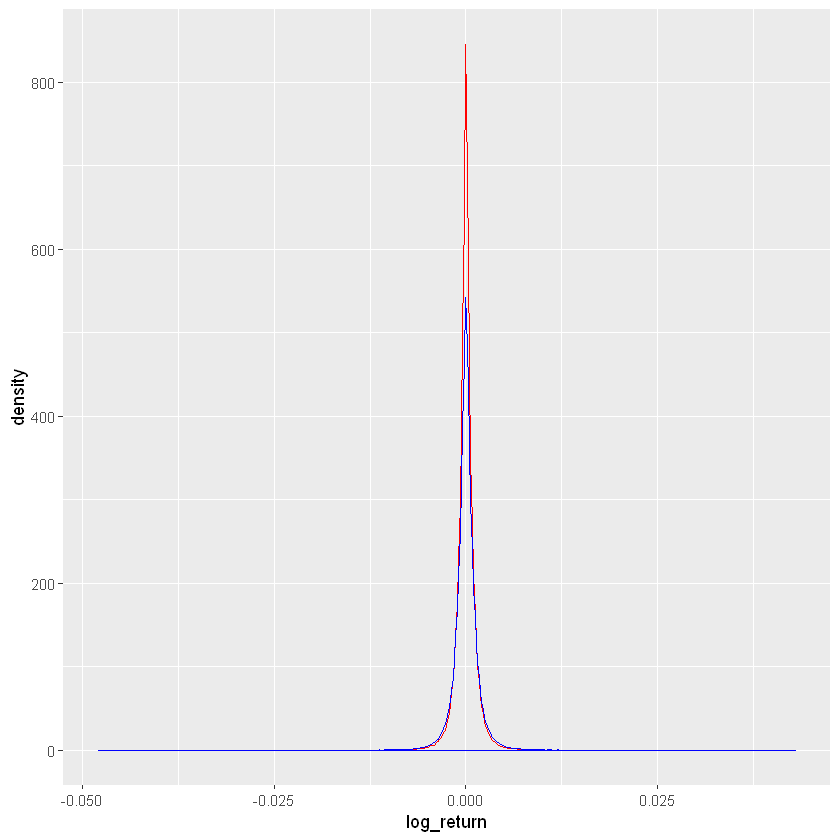

In [22]:
# Q7(a) Use geom_density() to visualize the distributions of the 1-minute log-returns of BTC and ETH
ggplot() +
  geom_density(data = BTC_min_c, mapping = aes(x = log_return), color = "red") +
  geom_density(data = ETH_min_c, mapping = aes(x = log_return), color = "blue")
# It looks like they are not close to a normal distribution since they have long left tails.

In [23]:
# Q7(b) use shapiro.test to test if the daily log-returns of BTC and ETH follow a normal distribution.
shapiro.test(BTC_day_c$log_return)


	Shapiro-Wilk normality test

data:  BTC_day_c$log_return
W = 0.89364, p-value < 2.2e-16


In [24]:
shapiro.test(ETH_day_c$log_return)


	Shapiro-Wilk normality test

data:  ETH_day_c$log_return
W = 0.91328, p-value < 2.2e-16


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


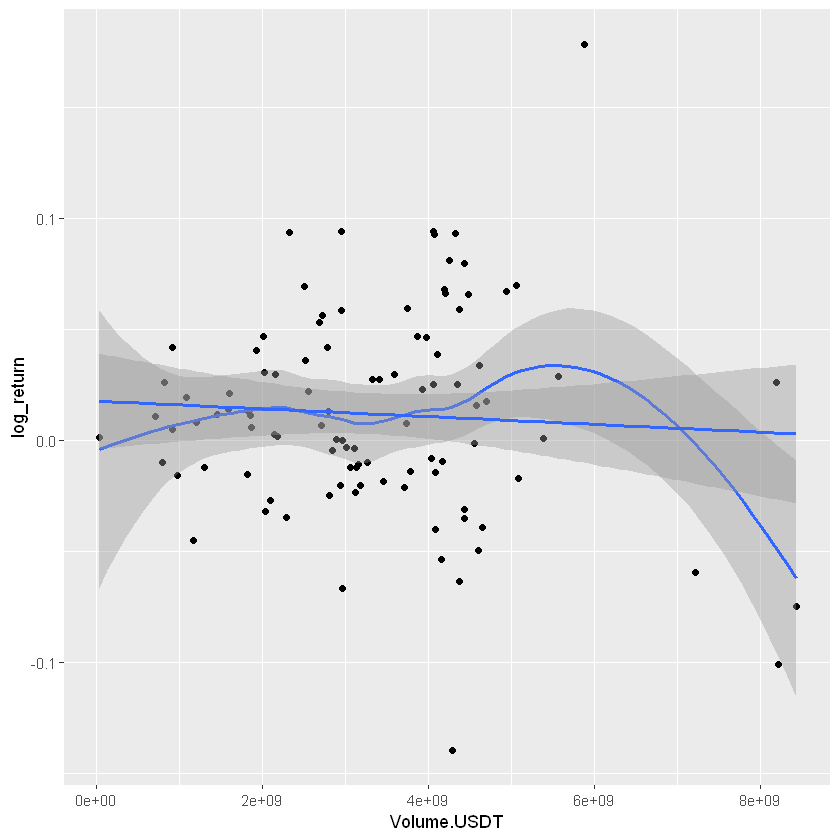

In [25]:
# Q8(a) Create a scatterplot of the daily log-return of BTC (y) versus the daily trading volume in USDT
# (the variable is Volume.USDT) (x) using the most recent 100 observations.
ggplot(data = BTC_day_c[1:100,], aes(x = Volume.USDT, y = log_return)) +
  geom_point() +
  geom_smooth() +
  geom_smooth(method = "lm")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


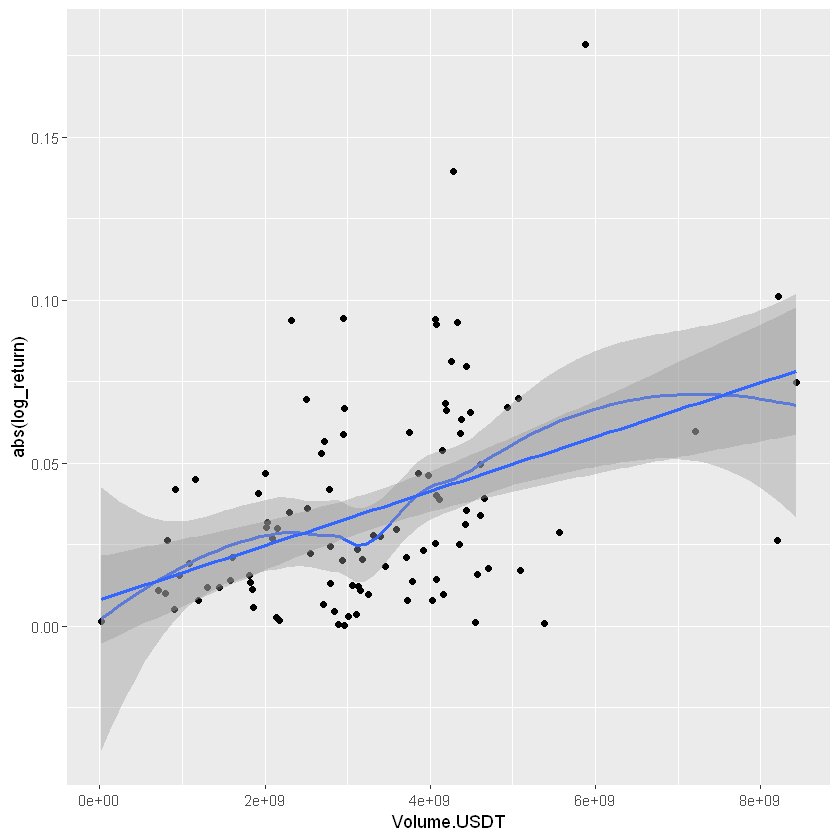

In [26]:
# Q8(b) Create a scatterplot of the absolute value of the daily log-return of BTC (y) versus the daily trading
# volume in USDT (the variable is Volume.USDT) (x) using the most recent 100 observations.
ggplot(data = BTC_day_c[1:100,], aes(x = Volume.USDT, y = abs(log_return))) +
  geom_point() +
  geom_smooth() +
  geom_smooth(method = "lm")


# Q8(c) What do you observe in Q8(a) and Q8(b)?
# The daily log-return of BTC and the daily trading volume in USDT are not linearly related.
# The absolute value of the daily log-return of BTC and the daily trading volume in USDT have
# a weak positive linear relationship.

In [27]:
# Q9(a) Compute the sample correlation of the daily log-return of ETH and the daily log return of BTC on
# each day by using the most recent 30 days data.
n <- nrow(ETH_day_c)
day <- 30
correlation <- rep(0, n - day + 1)
for (i in 1:(n - day + 1)){
  j <- i + day -1
  correlation[i] <- cor(ETH_day_c[i:j,]$log_return, BTC_day_c[i:j,]$log_return)
}
correlation

[1]  0.800483611  0.782453157  0.758754132  0.754684132  0.752380711
   [6]  0.767375940  0.767093566  0.763581353  0.753976679  0.794549591
  [11]  0.794040043  0.795408479  0.786728142  0.789686469  0.768024804
  [16]  0.765307493  0.782047351  0.797887002  0.778481173  0.773095772
  [21]  0.652171944  0.612495639  0.629624775  0.742961006  0.762120107
  [26]  0.737058316  0.737633412  0.740496578  0.721870714  0.739599227
  [31]  0.744610992  0.754156845  0.768085468  0.783190112  0.781595461
  [36]  0.821872241  0.814524062  0.803776410  0.809138911  0.808820970
  [41]  0.776336859  0.710728053  0.702424859  0.692540079  0.690824260
  [46]  0.684382619  0.683807428  0.664477156  0.653887685  0.640426685
  [51]  0.656041117  0.655945132  0.648111741  0.502253665  0.519989171
  [56]  0.563151376  0.559126574  0.557685352  0.559310839  0.547587791
  [61]  0.543003877  0.530432463  0.512313177  0.384413033  0.380626985
  [66]  0.425249272  0.426523792  0.501271137  0.476580555  0.466813388
  [71]  0.528878046  0.752616168  0.733696906  0.736469449  0.755444758
  [76]  0.774883831  0.764973091  0.770829965  0.836483344  0.881863881
  [81]  0.882978491  0.871351514  0.815922566  0.800030384  0.751391990
  [86]  0.757122715  0.762460066  0.761228853  0.797823404  0.782003709
  [91]  0.782567163  0.786758435  0.781044249  0.758419458  0.757967616
  [96]  0.752536217  0.755354335  0.740621261  0.752763249  0.706563677
 [101]  0.671204806  0.641953030  0.638067828  0.645562515  0.611265750
 [106]  0.584154822  0.580041802  0.571183475  0.586617540  0.475038055
 [111]  0.439302455  0.475698646  0.541210658  0.558123294  0.605652151
 [116]  0.617333611  0.602270861  0.599160647  0.573480980  0.564911247
 [121]  0.573052803  0.556786159  0.574015093  0.598178602  0.590329410
 [126]  0.595371193  0.587737862  0.559362888  0.500199090  0.637028229
 [131]  0.707512302  0.727179486  0.734160599  0.713616138  0.751252420
 [136]  0.757553407  0.757113696  0.763179967  0.740055371  0.736297126
 [141]  0.752066267  0.736649434  0.789050200  0.812616748  0.835674120
 [146]  0.890603905  0.931074780  0.941700843  0.940545869  0.868986588
 [151]  0.856353725  0.821401592  0.819430945  0.815742267  0.802292848
 [156]  0.800923803  0.799953001  0.797034377  0.806694405  0.804032368
 [161]  0.788277939  0.789311674  0.769361483  0.807600526  0.819821827
 [166]  0.817971414  0.816385830  0.817727945  0.816126684  0.818029409
 [171]  0.817154491  0.817635572  0.808086674  0.803371075  0.802436756
 [176]  0.787626748  0.792632363  0.796418636  0.799154851  0.814631278
 [181]  0.797970298  0.814188611  0.810051401  0.812179163  0.809524268
 [186]  0.809846713  0.809459189  0.807257569  0.803823342  0.808715849
 [191]  0.810146763  0.843511139  0.840385331  0.770087257  0.733230100
 [196]  0.720647343  0.751658485  0.752752065  0.735779661  0.724202271
 [201]  0.725909987  0.644876363  0.615070239  0.601747784  0.597664105
 [206]  0.593785272  0.557238965  0.562005087  0.551879368  0.531594491
 [211]  0.560526047  0.561210361  0.574045065  0.584645155  0.601345815
 [216]  0.605095579  0.562915712  0.570507919  0.562661088  0.579306892
 [221]  0.569489189  0.578090294  0.599420129  0.603378914  0.602466306
 [226]  0.552900392  0.527044499  0.520247936  0.560074687  0.568787719
 [231]  0.557941906  0.815909486  0.844997285  0.872043637  0.884071397
 [236]  0.890028865  0.953907487  0.948903350  0.946353725  0.947482161
 [241]  0.949895456  0.952583147  0.957873026  0.945449631  0.945885327
 [246]  0.946178801  0.948605935  0.956098062  0.960792532  0.958614536
 [251]  0.956956888  0.957019708  0.958415207  0.956606760  0.942058063
 [256]  0.943204740  0.910872854  0.929473633  0.924116748  0.874987731
 [261]  0.869098880  0.881191046  0.882083429  0.881279944  0.875789863
 [266]  0.875985079  0.866865822  0.860046980  0.873431248  0.875163997
 [271]  0.873713669  0.866758731  0.868477717  0.871138350  0.879526510
 [276]  0.860503234  0.864860456  0.8436126

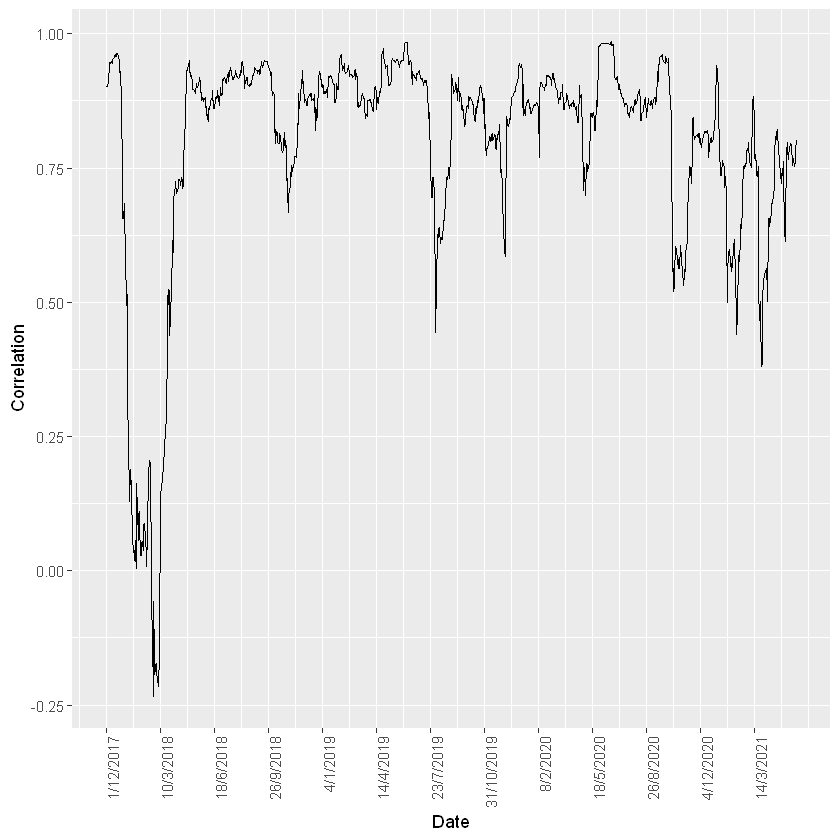

In [28]:
# Q9(b)
data_label <- str_remove(ETH_day_c$date," 0:00")[rev(seq(1, n - day + 1, by = 100))]
ggplot(mapping = aes(x = 1:(n - day + 1), y = rev(correlation))) +
  geom_line() +
  scale_x_continuous(name = "Date", breaks = seq(1, n - day + 1, by = 100), labels = data_label) +
  theme(axis.text.x = element_text(angle = 90, hjust=1)) +
  labs(y = "Correlation")

In [29]:
# Q10 What do you observe in Q9(b)?
# The daily log-return of ETH and the daily log return of BTC during most of dates have
# moderate and strong positive linear relationships since their values of correlation are 
# between 0.5 and 1, while they have weak negative linear relationships within approximately 
# 25 days prior to 10/3/2018 since their values of correlation are between -0.25 and 0.